**CODE SUMMARY:** in this code we are following a similar format as we did for the case of machine learning models. We start a bit differently, though, by setting up colab (which we didn't do for ML) and importing relevant libraries. Then, we define our training parameters. After that we load and visualize our data for each class. We use the get_data function in ourder to build our training and testing arrays. We then define our CNN and proceed to fit the model to our data. After that, we plot performance metrics with particular emphasis on the confusion matrix. In order to build the confusion matrix, we had to do some additional of the predictions vector, *y_pred* (compared to the binary classification case).

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
import os
os.chdir("/content/gdrive/My Drive/Colab Notebooks/Final_Project")

Mounted at /content/gdrive


In [2]:
#Basic
import numpy as np
import cv2
import scipy
import os
from keras.utils import np_utils
import random

#Pre-processing
import glob
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from time import time

#Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, Lambda
from keras.layers import Dense
from keras.utils import np_utils

#Visualizers
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
epochs = 10
BASE_DIR = "/content/gdrive/My Drive/Colab Notebooks/Final_Project/"
batch_size = 32

In [4]:
imagePatches = glob.glob(BASE_DIR +'dataset/Train/Class1/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (125).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (112).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (106).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (109).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (124).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (101).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (120).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (107).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (102).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19 (1).png


(224, 224, 3)


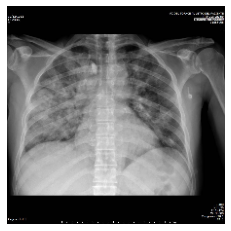

In [5]:
image_name = "/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class1/COVID-19(144).png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name)
    image = cv2.resize(image, (224,224))

    print(image.shape)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name)

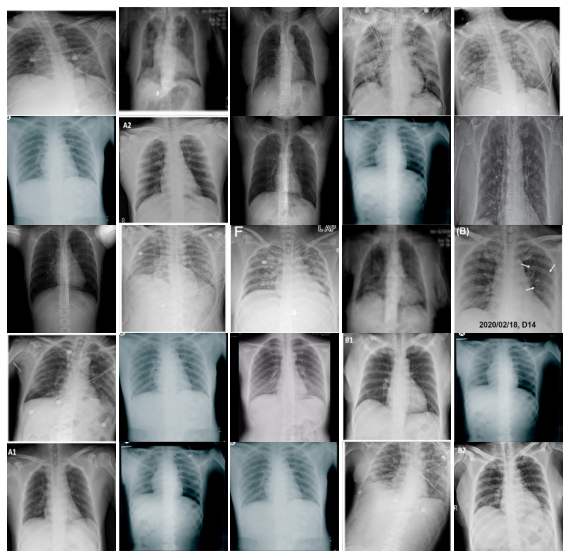

In [6]:
# Plot Multiple Images
bunchOfImages = imagePatches
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [7]:
imagePatches2 = glob.glob(BASE_DIR +'dataset/Train/Class2/*.png', recursive=True)
for filename in imagePatches2[0:10]:
    print(filename)

/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (108).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1066).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1071).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1067).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1063).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (107).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1069).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1062).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1070).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (1068).png


(224, 224, 3)


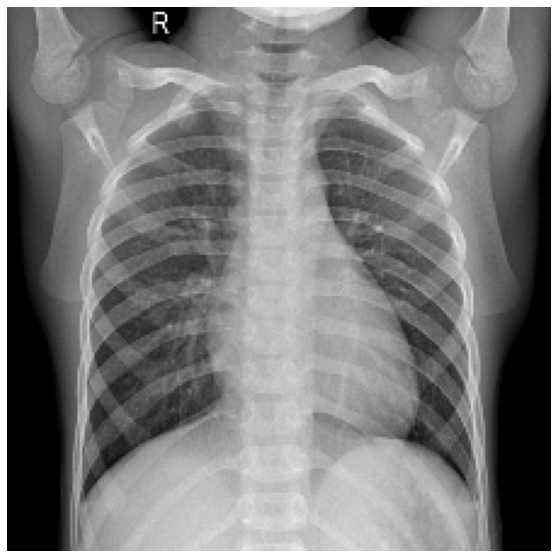

In [8]:
image_name2 = "/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class2/NORMAL (132).png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name2)
    image = cv2.resize(image, (224,224))
    print(image.shape)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotImage(image_name2)

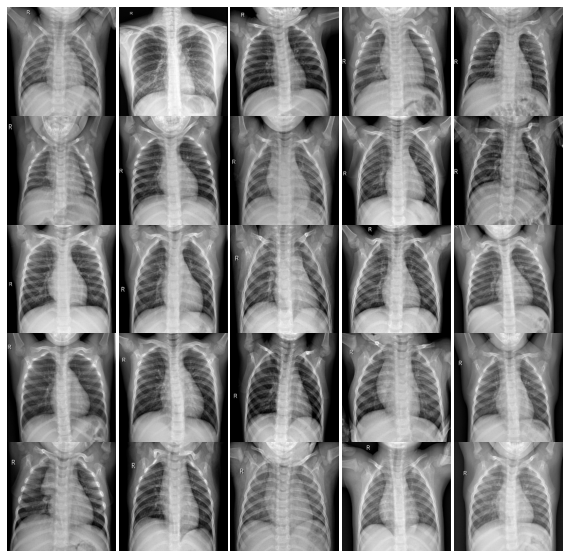

In [9]:
# Plot Multiple Images
bunchOfImages2 = imagePatches2
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages2[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [10]:
imagePatches3 = glob.glob(BASE_DIR +'dataset/Train/Class3/*.png', recursive=True)
for filename in imagePatches3[0:10]:
    print(filename)

/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1061).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1063).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1060).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1052).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1059).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1071).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1065).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1064).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (106).png
/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class

(224, 224, 3)


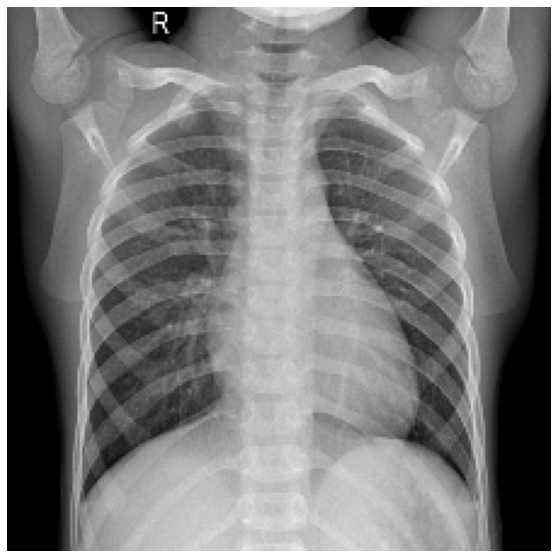

In [11]:
image_name3 = "/content/gdrive/My Drive/Colab Notebooks/Final_Project/dataset/Train/Class3/Viral Pneumonia (1).png" #Image to be used as query
def plotImage(image_location):
    image = cv2.imread(image_name2)
    image = cv2.resize(image, (224,224))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    print(image.shape)
    return
plotImage(image_name2)

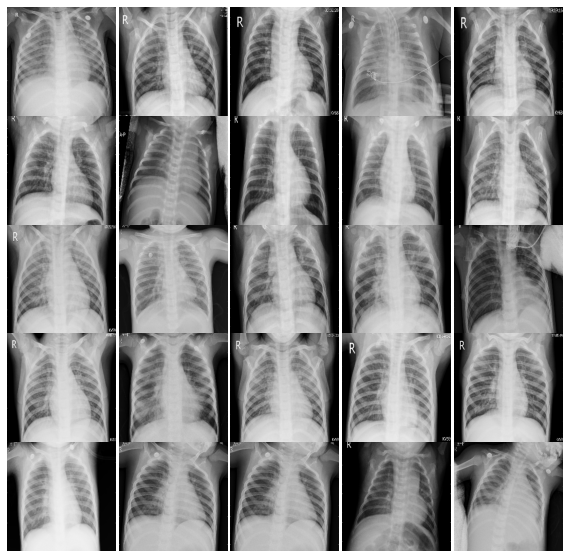

In [12]:
# Plot Multiple Images
bunchOfImages3 = imagePatches3
i_ = 0
plt.rcParams['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust(wspace=0, hspace=0)
for l in bunchOfImages3[:25]:
    im = cv2.imread(l)
    im = cv2.resize(im, (224, 224)) 
    plt.subplot(5, 5, i_+1) #.set_title(l)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB)); plt.axis('off')
    i_ += 1

In [13]:
def get_data(folder):
    """
    Load the data and labels from the given folder.
    """
    X = []
    y = []

    for rayx_type in os.listdir(folder):
        if not rayx_type.startswith('.'):
            if rayx_type in ['Class1']:
                label = '0'
            else:
                if rayx_type in ['Class2']:
                    label = '1'
                else:
                    label ='2'
            for image_filename in os.listdir(folder + rayx_type):
                img_file = cv2.imread(folder + rayx_type + '/' + image_filename)
                if img_file is not None:
                    # Downsample the image to 224, 224, 3
                    #img_file = scipy.misc.imresize(arr=img_file, size=(120, 160, 3))
                    #img_arr = np.asarray(img_file)
                    image = cv2.resize(img_file, (320, 240))
                    img_arr = np.asarray(image)
                    X.append(img_arr)
                    y.append(label)
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [14]:
from keras.utils import to_categorical

X_train, y_train = get_data(BASE_DIR + 'dataset/Train/')
X_test, y_test = get_data(BASE_DIR + 'dataset/Test/')

encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_test = encoder.transform(y_test)

In [15]:
def get_model():
    model = Sequential()
    model.add(Lambda(lambda x: x * 1./255., input_shape=(240, 320, 3), output_shape=(240, 320, 3)))
    model.add(Conv2D(32, (3, 3), input_shape=(240, 320, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(32, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dropout(0.7))
    model.add(Dense(3))
    model.add(Activation('sigmoid'))

    model.compile(loss='sparse_categorical_crossentropy',
                optimizer='sgd',
                metrics=['accuracy'])

    return model

In [16]:
model = get_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 240, 320, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 238, 318, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 238, 318, 32)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 119, 159, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 117, 157, 32)      9248      
_________________________________________________________________
activation_1 (Activation)    (None, 117, 157, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 58, 78, 32)        0

In [17]:
model = get_model()

# fits the model on batches
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    epochs=epochs,
    shuffle=True,
    batch_size=batch_size)

Epoch 1/10
59/59 [==============================] - 166s 3s/step - loss: 0.9197 - accuracy: 0.5319 - val_loss: 0.7757 - val_accuracy: 0.2387
Epoch 2/10
59/59 [==============================] - 168s 3s/step - loss: 0.8568 - accuracy: 0.5735 - val_loss: 0.9283 - val_accuracy: 0.0559
Epoch 3/10
59/59 [==============================] - 166s 3s/step - loss: 0.7481 - accuracy: 0.6223 - val_loss: 0.6435 - val_accuracy: 0.8086
Epoch 4/10
59/59 [==============================] - 166s 3s/step - loss: 0.6696 - accuracy: 0.6843 - val_loss: 0.5983 - val_accuracy: 0.7591
Epoch 5/10
59/59 [==============================] - 168s 3s/step - loss: 0.6120 - accuracy: 0.7537 - val_loss: 0.1534 - val_accuracy: 0.9806
Epoch 6/10
59/59 [==============================] - 166s 3s/step - loss: 0.5060 - accuracy: 0.7943 - val_loss: 0.9852 - val_accuracy: 0.4946
Epoch 7/10
59/59 [==============================] - 166s 3s/step - loss: 0.4404 - accuracy: 0.8290 - val_loss: 0.1977 - val_accuracy: 0.9656
Epoch 8/10
59

In [18]:
from sklearn.metrics import accuracy_score

print('Predicting on test data')
y_pred = np.argmax(model.predict(X_test), axis=1)
print(accuracy_score(y_test, y_pred))

Predicting on test data
0.7913793103448276


[[ 24   5  14]
 [  0 259   9]
 [  2  91 176]]


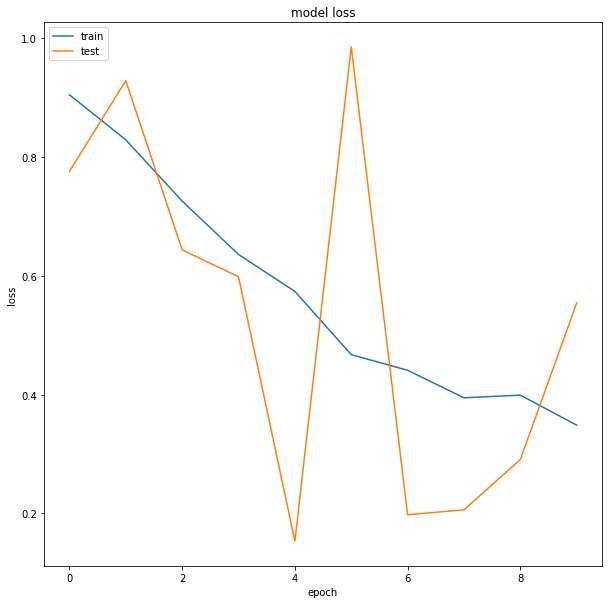

In [19]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./accuracy_curve.png')
    plt.clf()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.savefig('./loss_curve.png')

plot_learning_curve(history)
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

In [20]:
import matplotlib.pyplot as plt
#Note, this code is taken from the SKLEARN website.
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

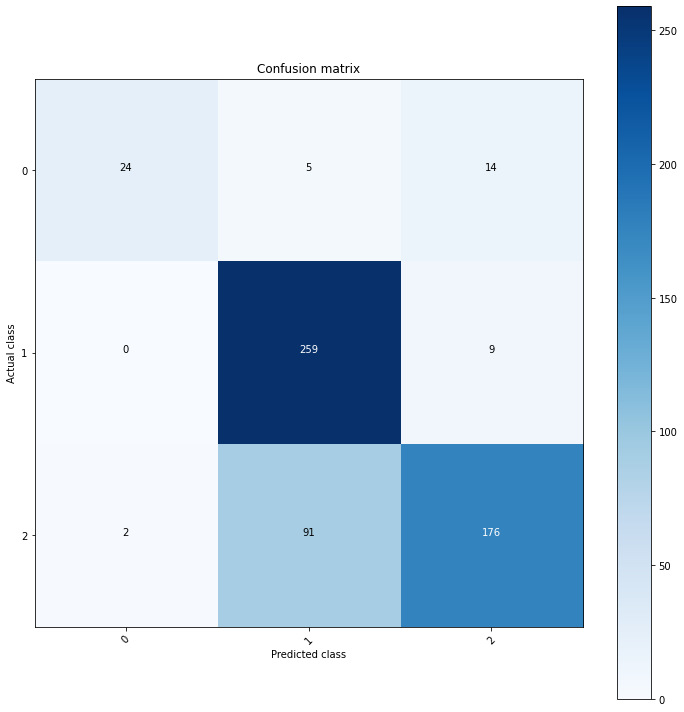

In [21]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools
# compute the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred) 
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(3))